In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('NAS.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4253 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj_Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 232.7+ KB


In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Convert date to datetime
dataset.iloc[:, 0]= pd.to_datetime(dataset.iloc[:, 0])        
#Setting date as index
#dataset.set_index('Date',inplace=True)                   
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4218 non-null   datetime64[ns]
 1   Open       4218 non-null   float64       
 2   High       4218 non-null   float64       
 3   Low        4218 non-null   float64       
 4   Close      4218 non-null   float64       
 5   Adj_Close  4218 non-null   float64       
 6   Volume     4218 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 263.6 KB


In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])    
dataset['date_delta'] = (dataset['Date'] - dataset['Date'].min())  / np.timedelta64(1,'D')

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,date_delta
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,4.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,5.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,11.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4218 non-null   datetime64[ns]
 1   Open        4218 non-null   float64       
 2   High        4218 non-null   float64       
 3   Low         4218 non-null   float64       
 4   Close       4218 non-null   float64       
 5   Adj_Close   4218 non-null   float64       
 6   Volume      4218 non-null   float64       
 7   date_delta  4218 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 296.6 KB


In [9]:
X = dataset.drop(['High','Low','Open','Close','Volume','Adj_Close','Date'],axis='columns')

In [10]:
X.head(10)

,date_delta
0,0.0
1,1.0
2,4.0
3,5.0
7,11.0
8,12.0
11,15.0
12,18.0
13,19.0
14,20.0


In [11]:
y = dataset.drop(['High','Low','Open','Close','Volume','Date','date_delta'],axis='columns')

In [12]:
#Adj_Close = dataset.Adj_Close

In [12]:
y.head(10)

,Adj_Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800
7,17.254400
8,17.711500
11,17.768600
12,17.711500
13,17.597200
14,17.140100


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
X

,date_delta
0,0.0
1,1.0
2,4.0
3,5.0
7,11.0
...,...
4248,6143.0
4249,6144.0
4250,6145.0
4251,6146.0


In [15]:
y

,Adj_Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800
7,17.254400
...,...
4248,0.676800
4249,0.600600
4250,0.626000
4251,0.605000


In [16]:
#regObj = linear_model.LinearRegression()
#regObj.fit(X,y)

LinearRegression()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [17]:
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02],
       ...,
       [1.00000000e+00, 6.14500000e+03, 3.77610250e+07, 2.32041499e+11,
        1.42589501e+15],
       [1.00000000e+00, 6.14600000e+03, 3.77733160e+07, 2.32154800e+11,
        1.42682340e+15],
       [1.00000000e+00, 6.14700000e+03, 3.77856090e+07, 2.32268139e+11,
        1.42775225e+15]])

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

In [ ]:
#We've implemented polynomial regression instead of linear regression

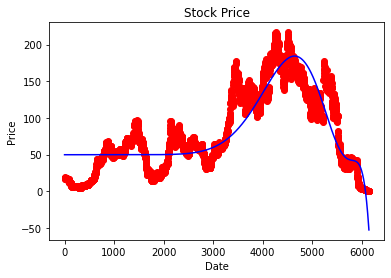

In [24]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=15)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X ['date_delta']), max(X['date_delta']), 0.01, dtype= float) 
X_grid = X_grid.reshape((len(X_grid), 1))
     
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Stock Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

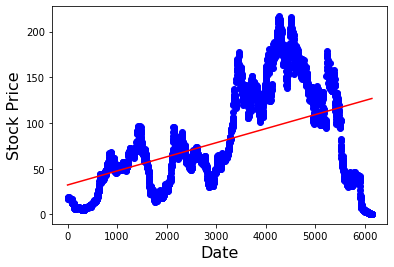

In [21]:
#%matplotlib inline
#plt.xlabel('Date',fontsize=16)
#plt.ylabel('Stock Price',fontsize=16)
#Visual Represention of linear equation with Linear Regression
#plt.scatter(dataset.date_delta,dataset.Adj_Close,color='blue')
#plt.plot(dataset.date_delta,regObj.predict(dataset[['date_delta']]),color='red') 